<a href="https://colab.research.google.com/github/Rayanfer32/MLworks/blob/master/T2_PR_Fmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**The task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

https://www.kaggle.com/zalando-research/fashionmnist

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [0]:
# set the tensorflow version to 2
tensorflow_version 2.x

In [8]:
# import tensorflow and check for the version 
import tensorflow as tf
tf.__version__

'2.1.0-rc1'

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [0]:
#Load the fashion_mnist data set from tensorflow.keras.datasets
from tensorflow.keras.datasets import fashion_mnist
(X_train,y_train),(X_test ,y_test) = fashion_mnist.load_data()

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [0]:
# import matplotlib and invoke inline 
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#print the first sample in the training set
X_train[0]

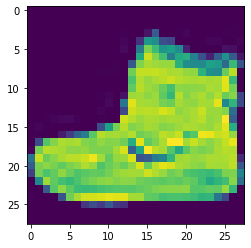

In [25]:
# Plot the first train image 
plt.imshow(X_train[0])

In [18]:
#Print the Lable of the first training image 
y_train[0]

9

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [26]:
# Print the max value in the train-set
X_train.max()

255

In [0]:
#Normalize the train-set
if X_train.max() >= 255:
  X_train = X_train/255

In [0]:
# Normalize the test-set
if X_test.max() >= 255:
  X_test = X_test/255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [29]:
# print the shape of the train-set
X_train.shape

(60000, 28, 28)

In [0]:
#reshape the train set to include the channel information
X_train = X_train.reshape(60000,28,28,1)

In [0]:
#reshape the test-set to include the channel information
X_test = X_test.reshape(10000,28,28,1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [0]:
# import to_categorical function from utils  of keras  in tensorflow 
from tensorflow.keras.utils import to_categorical


In [0]:
# Print the lables of the train-set


In [0]:
# convert the labeles of train-set  to categorical
y_cat_train = to_categorical(y_train)

In [0]:
# convert the labeles of  test-set to categorical
y_cat_test = to_categorical(y_test)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [0]:
# Import the model and layers required from keras library Sequential, Conv2D - MaxPool2D - Dense - Flatten
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [0]:
# Create the model object from sequencial
model = Sequential()

## Add Layers to the model 
# CONVOLUTIONAL LAYER  with filters=32,  kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'
model.add(Conv2D(filters=32,input_shape=(28,28,1),kernel_size=(4,4),activation='relu'))

# POOLING LAYER with pool_size=(2, 2)
model.add(MaxPooling2D(pool_size=(2,2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
# with activation='relu'
model.add(Dense(128,activation='relu'))

# Dense layer LAST LAYER  IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES 
# activation='softmax'
model.add(Dense(10,activation='softmax'))

# compile or build the model with appropriate loss, optimizer, and metrics  parameters set 
model.compile(loss ="categorical_crossentropy",optimizer="adam",metrics=['accuracy'] )

In [0]:
# Display the summary of the model built 


### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [0]:
# Train or fit  the modle for a certain epoch using the training data and lables
model.fit(X_train, y_cat_train, epochs=10)

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [0]:
# display the model metrics 
model metrics

In [0]:
# Evaluate the model on the test-set
pred = model.predict()

In [0]:
# For further evaluation 
# Import the classification_report from sklearn metrics lib
from sklearn.metrics import classification_report

In [0]:
# Determine the class predections from the test-set
print(classification_report(y_test,pred))

In [0]:
# print the shape of catecorical test lables


(10000, 10)


In [0]:
#print first categorical lable of test-set


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
#print the first predection   


9

In [0]:
#print test-set labeles 


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [0]:
# print the classification report using the predicted valuse and labeles note not categorical but lables


# Great Job!